In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt

In [23]:
'''原始非法数据'''
df_illegal = pd.read_csv('illegal-out.csv')
df_illegal

,issuer_country,subject_country,version,sign_algorithm,digital_signature,key_encipherment,data_encipherment,key_agreement,non_repudiation,serial_number_length,...,nsComment_is_exist,nsBaseUrl_is_exist,nsRevocationUrl_is_exist,nsCaPolicyUrl_is_exist,nsCertType_is_critical,issuerAltName_is_critical,nsComment_is_critical,nsBaseUrl_is_critical,nsRevocationUrl_is_critical,nsCaPolicyUrl_is_critical
0,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,US,2,sha384WithRSAEncryption,1,1,0,0,0,150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,US,2,sha384WithRSAEncryption,1,1,0,0,0,150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,126,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3209,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,139,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3210,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,138,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3211,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,123,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
'''原始合法数据'''
df_legal = pd.read_csv('legal-out.csv')
df_legal

,issuer_country,subject_country,version,sign_algorithm,digital_signature,key_encipherment,data_encipherment,key_agreement,non_repudiation,serial_number_length,...,ms-app-policies_is_critical,ms-cert-templ_is_critical,issuerAltName_is_exist,issuerAltName_is_critical,nsComment_is_exist,nsComment_is_critical,qcStatements_is_exist,qcStatements_is_critical,tlsfeature_is_exist,tlsfeature_is_critical
0,US,NaN,2,sha256WithRSAEncryption,1,0,0,0,0,126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,NaN,2,sha256WithRSAEncryption,1,0,0,0,0,126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,124,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8974,US,US,2,ecdsa-with-SHA256,1,0,0,0,0,123,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8975,US,NaN,2,ecdsa-with-SHA384,1,0,0,0,0,138,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8976,US,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,124,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [25]:
class Preprocessing():
    def read_csv(self, filename):
        self.df = pd.read_csv(filename, index_col=0)
    
    
    def read_df(self, df):
        self.df = df


    def merge_and_tag(self, df_illegal, df_legal):
        '''merge illegal + legal dataframe, tag 0 for legal, 1 for illegal'''
        df_illegal['label'] = 1
        df_legal['label'] = 0
        self.df = pd.merge(df_illegal, df_legal, how='outer')


    def onehot_encoding(self, X):
        enc = OneHotEncoder(handle_unknown='ignore')
        transformed = enc.fit_transform(X).toarray()
        category = enc.categories_
        feature_name = enc.get_feature_names_out()
        encoded_df = pd.DataFrame(transformed)
        encoded_df.columns = feature_name
        return encoded_df
    

    def ordinal_encoding(self, X):
        '''sequence ordinal, nan --> 0'''
        enc = OrdinalEncoder(encoded_missing_value=-1)
        transformed = enc.fit_transform(X)
        category = enc.categories_
        feature_name = enc.get_feature_names_out()
        encoded_df = pd.DataFrame(transformed)
        encoded_df.columns = feature_name
        return encoded_df
    

    def hash_encoding(self, X, n=8):
        '''n: hash digit, input type: string only, nan --> 0'''
        X = X.fillna('0')
        X = X.values.tolist()
        enc = FeatureHasher(n_features=n, input_type="string")
        transformed = enc.transform(X).toarray()
        return pd.DataFrame(transformed)


    def verify_feature(self, df):
        '''find invalid features (all 0/1) / identical samples and delete'''
        all_zero_col = df.apply(lambda x: all(x==0))
        df = df.drop(df.columns[all_zero_col], axis=1)
        all_one_col = df.apply(lambda x: all(x==1))
        df = df.drop(df.columns[all_one_col], axis=1)
        df.drop_duplicates(inplace=True)
        return df


    def run(self, encoding):
        '''encoding for string-value feature, encoding = [onehot, ordinal, hash, count]'''
        X = self.df[['issuer_country', 'subject_country', 'sign_algorithm']]
        df = self.df.drop(['issuer_country', 'subject_country', 'sign_algorithm'], axis=1)

        if encoding == 'onehot':
            encoded_df = self.onehot_encoding(X)
        if encoding == 'ordinal':
            encoded_df = self.ordinal_encoding(X)
        if encoding == 'hash':
            encoded_df = self.hash_encoding(X)

        df = pd.concat([df, encoded_df], axis=1)
        df.columns = df.columns.astype(str)
                
        '''Here, the rest of Nan represents non-exist/non-critial, therefore is replaced by 0'''
        df = df.fillna(0)
    
        return df
    

    def PCA_analysis_figure(self, df, label):
        pca = PCA(n_components=2)
        x_r = pca.fit_transform(df)

        plt.figure()
        colors = ['navy', 'darkorange']
        for color, i in zip(colors, [0, 1]):
            plt.scatter(x_r[label == i, 0], x_r[label == i, 1], color=color)
        plt.show()
        return x_r

In [26]:
'''
合并非法、合法数据
加上label, 合法为0, 非法为1
'''
pre = Preprocessing()
pre.merge_and_tag(df_illegal, df_legal)
pre.df.to_csv('feature.csv', sep=',', header=True, index=False)
pre.df

,issuer_country,subject_country,version,sign_algorithm,digital_signature,key_encipherment,data_encipherment,key_agreement,non_repudiation,serial_number_length,...,nsCaPolicyUrl_is_exist,nsCertType_is_critical,issuerAltName_is_critical,nsComment_is_critical,nsBaseUrl_is_critical,nsRevocationUrl_is_critical,nsCaPolicyUrl_is_critical,label,tlsfeature_is_exist,tlsfeature_is_critical
0,--,--,2,sha1WithRSAEncryption,1,0,0,0,0,15,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,1.0,0.0
1,--,--,2,sha1WithRSAEncryption,1,1,0,0,0,15,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,1.0,0.0
2,--,--,2,sha256WithRSAEncryption,1,1,0,0,1,11,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN
3,--,--,2,sha256WithRSAEncryption,1,1,0,0,1,11,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN
4,--,--,2,sha256WithRSAEncryption,1,1,0,0,1,12,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12186,NaN,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,33,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN
12187,NaN,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,156,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,1.0,0.0
12188,NaN,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,158,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN
12189,NaN,NaN,2,sha256WithRSAEncryption,1,1,0,0,0,158,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN


In [27]:
'''
对issuer_country, subject_country, sign_algorithm的string类型数据进行hash编码
删除全0/1, 以及重复的samples
'''
res = pre.run(encoding='hash')
res = pre.verify_feature(res)
res.to_csv('nondu-hash8-feature.csv', sep=',', header=True, index=False)
res

,version,key_encipherment,data_encipherment,key_agreement,non_repudiation,serial_number_length,has_expired,issuer_cn_exist,subject_cn_exist,no_extension,...,label,tlsfeature_is_exist,0,1,2,3,4,5,6,7
0,2,0,0,0,0,15,1,1,1,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0
1,2,1,0,0,0,15,1,1,1,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0
2,2,1,0,0,1,11,0,1,1,0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0
4,2,1,0,0,1,12,0,1,1,0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0
5,2,1,0,0,1,13,0,1,1,0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,2,1,0,0,0,32,1,1,1,0,...,1,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0
12185,2,1,0,0,0,33,0,1,1,0,...,1,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0
12186,2,1,0,0,0,33,1,1,1,0,...,1,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0
12187,2,1,0,0,0,156,0,1,1,0,...,0,1.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0


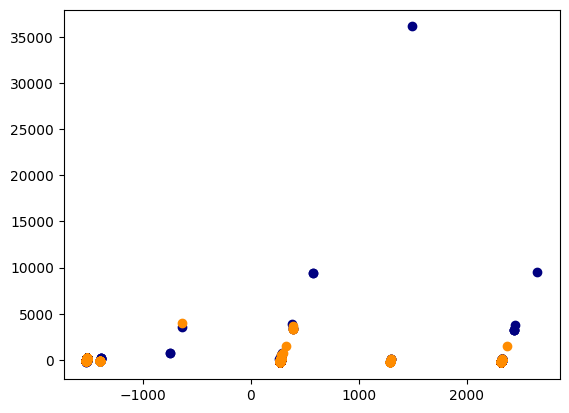

array([[-747.19047423,  727.90007113],
       [-747.39842037,  766.81514811],
       [ 279.60416317,   64.01332956],
       ...,
       [ 278.62739169,  237.97201893],
       [ 389.98765654, 3347.63100684],
       [ 328.6224901 , 1499.04117996]])

In [28]:
pre.PCA_analysis_figure(res.loc[:, res.columns != 'label'], res['label'])

In [29]:
class Training:
    def split(self, df):
        self.x = df.loc[:, df.columns != 'label']
        self.y = df['label']
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, train_size=0.8, shuffle=True)
        return self.x_train, self.x_test, self.y_train, self.y_test


    def gridSearch(self, model_name):
        if model_name == 'svm':
            parameters = {'kernel':['rbf','poly','sigmoid'], 'gamma': ['scale','auto'], 'degree':[3,4,5], 'C':[0.1, 1, 10]}
            model = svm.SVC()

        elif model_name == 'xgboost':
            parameters = {'max_depth': [2,3,4,5,6,7], 'min_child_weight': [1,2,3], 'learning_rate':[0.01, 0.1, 1, 10]}
            other_params =  {'objective': 'binary:logistic', 'n_estimators': 20, 'seed': 0,'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
            model = xgb.XGBClassifier(**other_params)

        elif model_name == 'RF':
            parameters = {'n_estimators':range(30,80,10), 'max_depth':range(3,10,2), 'min_samples_leaf':[5,6,7],'max_features':[1,2,3]}
            model = RandomForestClassifier()
        else:
            return

        clf = GridSearchCV(estimator=model, param_grid=parameters)
        clf.fit(self.x_train, self.y_train)

        s1 = clf.score(self.x_train, self.y_train)
        s2 = clf.score(self.x_test, self.y_test)
        print(f'train score:{s1}, test scroe:{s2}')
        best_params = clf.best_estimator_.get_params()
        print(best_params)
        return clf.best_estimator_


    def cross_validation(self, model):
        cv_split = ShuffleSplit(n_splits=5, train_size=0.7)
        score_ndarray = cross_val_score(model, self.x, self.y, cv=cv_split)
        print(score_ndarray)
        print(score_ndarray.mean())


    def predict(self, model):
        model.fit(self.x_train, self.y_train)
        pred = model.predict(self.x_test)
        print(metrics.classification_report(self.y_test, pred))
        print(metrics.confusion_matrix(self.y_test, pred))

train score:0.995839719728487, test scroe:0.9964973730297724
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 20, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'seed': 0}
[0.99649737 0.99474606 0.9959136  0.99299475 0.9

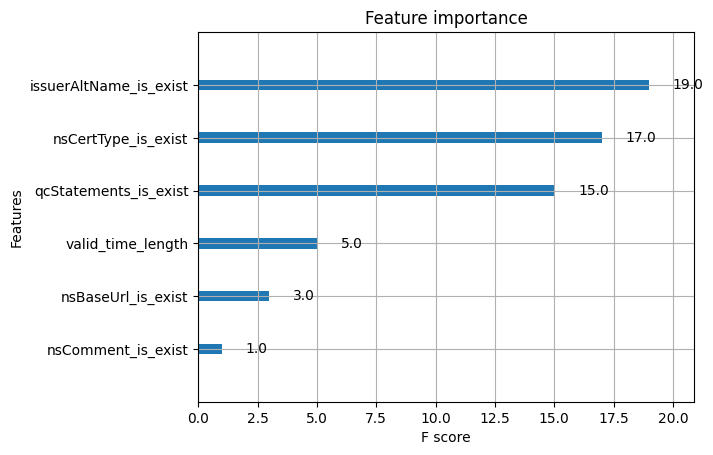

In [30]:
'''
划分训练集/测试集
gridSearch查找最优参数
交叉验证
'''
tr = Training()
tr.split(res)
best_model = tr.gridSearch('xgboost')
tr.cross_validation(best_model)
tr.predict(best_model)

xgb.plot_importance(best_model)
plt.show()